# 算法库导入

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# 加载数据

In [40]:
data = pd.read_csv('data/i-80mo.csv')
data

Vehicle_ID  Frame_ID  Local_X  Local_Y  Lane_ID
0                 1        12   16.884   48.213        2
1                 1        13   16.938   49.463        2
2                 1        14   16.991   50.712        2
3                 1        15   17.045   51.963        2
4                 1        16   17.098   53.213        2
...             ...       ...      ...      ...      ...
1043883        3366      3013    4.814  421.836        1
1043884        3366      3014    4.898  426.281        1
1043885        3366      3015    4.968  430.633        1
1043886        3366      3016    5.043  435.407        1
1043887        3366      3017    5.041  440.274        1

[1043888 rows x 5 columns]

# 数据处理

## 速度插值 

In [41]:
# X = []
# Y = []

# X_v = []
# Y_v = []

# for i in range(len(data)):
#     if i == 0:
#         X.append('none')
#         X_v.append('none')
#         Y.append('none')
#         Y_v.append('none')
#     else:
#         if data.Vehicle_ID[i] == data.Vehicle_ID[i-1]:
#             X.append(data.Local_X[i]-data.Local_X[i-1])
#             X_v.append((data.Local_X[i]-data.Local_X[i-1])/0.1)
#             Y.append(data.Local_Y[i]-data.Local_Y[i-1])
#             Y_v.append((data.Local_Y[i]-data.Local_Y[i-1])/0.1)
#         else:
#             X.append('none')
#             X_v.append('none')
#             Y.append('none')
#             Y_v.append('none')
# X

In [42]:
# dic = {'X': X, 'X_v': X_v, 'Y': Y, 'Y_v': Y_v}
# df = pd.DataFrame(data=dic)
# df

In [43]:
# # 合并数据集

# df = pd.concat([data, df], axis=1)
# df

## 特征提取 

In [44]:
# # none数据清洗

# df = df[df["X_v"] != 'none']
# df

In [45]:
# 车辆数统计

Vehicle_ID = data['Vehicle_ID']
Vehicle_ID_LIST = []
for i in range(len(data)):
    if Vehicle_ID[i] not in Vehicle_ID_LIST:
        Vehicle_ID_LIST.append(Vehicle_ID[i])
len(Vehicle_ID_LIST)

2989

## 标准化

In [46]:
# 定义MAX-MIN标准化函数
def normalize(X):
    norm = (X-min(X))/(max(X)-min(X))
    return norm


print(min(data["Local_X"]),max(data["Local_X"]),min(data["Local_Y"]),max(data["Local_Y"]))
LX = normalize(data["Local_X"])
LY = normalize(data["Local_Y"])

print(LX,'\n\n------------\n\n',len(LX))

0.003 96.99600000000001 0.0 444.962
0          0.174043
1          0.174600
2          0.175147
3          0.175703
4          0.176250
             ...   
1043883    0.049602
1043884    0.050468
1043885    0.051189
1043886    0.051963
1043887    0.051942
Name: Local_X, Length: 1043888, dtype: float64 

------------

 1043888


In [35]:
# 合并X，Y位置

arrtrain = []
traindata = []

for i in range(len(data)):
    if i == 0:
        arrtrain.append([LX.iloc[i], LY.iloc[i]])
    else:
        if i == len(data) - 1:
            arrtrain.append([LX.iloc[i], LY.iloc[i]])
            traindata.append(arrtrain)
        else:
            if data['Vehicle_ID'].iloc[i] == data['Vehicle_ID'].iloc[i-1]:
                arrtrain.append([LX.iloc[i], LY.iloc[i]])
            else:
                traindata.append(arrtrain)
                arrtrain = []
                arrtrain.append([LX.iloc[i], LY.iloc[i]])

In [36]:
len(traindata)

2989

In [37]:
# 长轨迹筛选

traindata2 = []
index = pd.DataFrame()

for i in range(len(traindata)):
    if len(traindata[i]) > 95:
        index = index.append({'i': i, 'len': len(traindata[i])},ignore_index=True)
        traindata2.append(traindata[i])

print(index)
len(traindata2)

           i     len
0        0.0   410.0
1        1.0   196.0
2        2.0   327.0
3        3.0   618.0
4        4.0  1066.0
...      ...     ...
2789  2981.0   140.0
2790  2982.0   223.0
2791  2983.0   121.0
2792  2986.0   176.0
2793  2987.0   257.0

[2794 rows x 2 columns]


2794

In [38]:
# 建立输入输出集
pre_in = []
pre_out = []

Input = []
Output = []

# 训练集输入输出筛选
for i in range(len(traindata2)):
    for j in range(len(traindata2[i])):
        if j % 5 == 0:
            if len(pre_in) < 10:
                pre_in.append(traindata2[i][j])
                pre_out.append(traindata2[i][j+45])
            else:
                Input.append(pre_in)
                Output.append(pre_out)
                pre_in = []
                pre_out = []
                break
        else:
            continue

print(len(Input))
print(Input)

2794
[[[0.17404348767436825, 0.10835307284667006], [0.17679626364789208, 0.1223992161128366], [0.17727052467703852, 0.1365869445031261], [0.17196086315507306, 0.15280630705543394], [0.16959986803171362, 0.16902566960774176], [0.17112575134288038, 0.1837325434531488], [0.17283721505675664, 0.198340532449962], [0.1745692988153784, 0.2129485214467752], [0.17629107255162743, 0.22755651044358843], [0.17801284628787645, 0.24215326252578873]], [[0.06310764694359386, 0.14843514727100293], [0.06310764694359386, 0.16758734453728633], [0.059746579650077826, 0.1803839428984947], [0.05740620457146392, 0.1916455787235764], [0.056303032177579815, 0.20074747956005232], [0.05720000412400894, 0.20647156386388055], [0.05806604600331982, 0.21227655395292183], [0.05892177786025795, 0.21808379142488574], [0.05979812976194158, 0.22388878151392708], [0.06065386161887971, 0.2297544509418782]], [[0.2924540946253853, 0.1438280122797003], [0.2925159547596218, 0.15309621945244764], [0.29250564473724905, 0.16231273

In [39]:
volume = []

df_dup = data.drop_duplicates(subset=['Vehicle_ID'], keep='first')
df_dup=df_dup['Vehicle_ID']

for i in range(len(index)):
    ivolume = []
    a = int(index['i'].iloc[i])
#     print('a: ',a)
    b = df_dup.iloc[a]
#     print('b: ',b)
    df_car = data[data['Vehicle_ID'] == b]
    for j in range(len(df_car)):
        ivolume.append(df_car['Lane_ID'].iloc[j])
#         print(i, ': ', ivolume)
    volume.append(ivolume)
#     print(i,': ',volume)
volume    

[[2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,


In [40]:
at_lane = []
lane = []
np.shape(volume)
for i in range(len(volume)):
    for j in range(0, 100, 5):
        at_lane.append(volume[i][j])
    lane.append(at_lane)
    at_lane = []
lane

[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
 [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
 [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
 [5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
 [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
 [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

## 异常变道数据清洗

In [41]:
lane_state = []
for i in range(len(lane)):
    for j in range(1,10):
        if lane[i][j] > lane[i][j-1]:
            if abs(lane[i][j]-lane[i][j-1])>=2:
                Input.pop(i)
                Output.pop(i)
                break
            else:
                lane_state.append([1, 0, 0])
                break
        elif lane[i][j] < lane[i][j-1]:
            if abs(lane[i][j]-lane[i][j-1])>=2:
                Input.pop(i)
                Output.pop(i)
                break
            else:            
                lane_state.append([0, 0, 1])
                break
        elif j == 9:
            lane_state.append([0, 1, 0])
            break
len(lane_state)

2648

## 异常坐标位置数据清理

In [42]:
# 0是横向，1是纵向
mark = []
for i in range(len(Input)):
    for j in range(1, 10):
        if abs(Input[i][j][0]-Input[i][j-1][0]) >= 0.3 or abs(Output[i][j][0]-Output[i][j-1][0]) >= 0.3 or abs(Input[i][j][1]-Input[i][j-1][1]) >= 0.3 or abs(Output[i][j][1] - Output[i][j-1][1]) >= 0.3 or Input[i][j][1]-Input[i][j-1][1] < -0.01 or Output[i][j][1] - Output[i][j-1][1] < -0.01:
            mark.append(i)
            break
print(len(mark), mark)
for k in range(len(mark)):
    Input.pop(mark[k]-k)
    Output.pop(mark[k]-k)
    lane_state.pop(mark[k]-k)
len(Input)

434 [29, 132, 147, 152, 201, 244, 258, 263, 275, 279, 282, 294, 301, 304, 309, 314, 316, 323, 324, 327, 332, 333, 336, 337, 338, 339, 342, 349, 358, 359, 365, 370, 375, 378, 379, 380, 385, 386, 398, 408, 411, 413, 414, 416, 417, 421, 424, 426, 437, 445, 452, 454, 459, 462, 476, 477, 497, 506, 510, 515, 516, 524, 525, 530, 531, 543, 544, 545, 564, 574, 587, 589, 592, 605, 610, 611, 621, 624, 629, 633, 635, 639, 642, 644, 651, 655, 662, 667, 669, 679, 681, 686, 693, 694, 698, 701, 709, 712, 715, 716, 719, 721, 727, 731, 735, 737, 739, 744, 745, 748, 754, 755, 758, 760, 765, 785, 786, 790, 801, 803, 809, 810, 824, 827, 828, 839, 840, 847, 851, 860, 871, 872, 874, 879, 881, 883, 885, 891, 895, 897, 899, 904, 905, 908, 909, 913, 919, 921, 922, 925, 928, 933, 940, 953, 954, 967, 979, 983, 986, 987, 991, 994, 998, 1005, 1010, 1018, 1023, 1024, 1033, 1040, 1042, 1045, 1047, 1048, 1050, 1064, 1066, 1071, 1072, 1082, 1089, 1097, 1098, 1106, 1123, 1130, 1132, 1134, 1139, 1143, 1144, 1145, 1146, 1

2214

In [43]:
Input = np.array(Input)
Output = np.array(Output)

print(Input.shape,Output.shape,len(lane_state))
# print(Input,'\n\n\n------------分割线-----------\n\n\n',Output)

(2214, 10, 2) (2214, 10, 2) 2214


## 训练测试集划分

In [44]:
In_train, In_test, Out_train, Out_test = train_test_split(
    Input, Output, test_size=0.30, random_state=43)
In_lanetrain, In_lanetest, Out_lanetrain, Out_lanetest = train_test_split(
    Input, lane_state, test_size=0.30, random_state=43)

print(In_train)
print(Out_train)

[[[0.68082233 0.06382118]
  [0.68402874 0.08907502]
  [0.68704958 0.11483677]
  ...
  [0.68491541 0.20787393]
  [0.68132752 0.22095595]
  [0.67906962 0.2283813 ]]

 [[0.65742889 0.05598456]
  [0.66074871 0.08636243]
  [0.66380048 0.11707067]
  ...
  [0.66641923 0.291108  ]
  [0.66470776 0.32266351]
  [0.66481086 0.35607985]]

 [[0.19702453 0.13825675]
  [0.19192107 0.17483066]
  [0.19206541 0.20495233]
  ...
  [0.17715711 0.38114266]
  [0.17576526 0.42397553]
  [0.17672409 0.4685726 ]]

 ...

 [[0.32340478 0.14605966]
  [0.31880651 0.17019206]
  [0.31174415 0.19579874]
  ...
  [0.32173456 0.29096642]
  [0.32119844 0.30683744]
  [0.31881682 0.32523451]]

 [[0.06051983 0.14843515]
  [0.06057138 0.20988759]
  [0.06063324 0.26592158]
  ...
  [0.06181889 0.49500632]
  [0.06169517 0.53243423]
  [0.06510779 0.57220841]]

 [[0.1840339  0.09137859]
  [0.17688905 0.1302673 ]
  [0.16982669 0.16901893]
  ...
  [0.18793109 0.34046728]
  [0.18912705 0.37134856]
  [0.19060138 0.40161857]]]
[[[0.67906

In [45]:
np.save('data/Intrain1',In_train)
np.save('data/Outtrain1',Out_train)
np.save('data/Intest1',In_test)
np.save('data/Outtest1',Out_test)
np.save('data/Outlanetrain1',Out_lanetrain)
np.save('data/Outlanetest1',Out_lanetest)

# 可视化

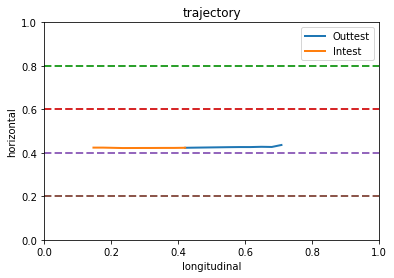

In [46]:
i=4
aIntest = In_test[i].swapaxes(0, 1)
aOuttest = Out_test[i].swapaxes(0, 1)

plt.plot(aOuttest[1], aOuttest[0], lw=2, label="Outtest")
plt.plot(aIntest[1], aIntest[0], lw=2, label="Intest")

plt.plot(np.linspace(0, 1, 2), [0.8, 0.8], lw=2, linestyle='--')
plt.plot(np.linspace(0, 1, 2), [0.6, 0.6], lw=2, linestyle='--')
plt.plot(np.linspace(0, 1, 2), [0.4, 0.4], lw=2, linestyle='--')
plt.plot(np.linspace(0, 1, 2), [0.2, 0.2], lw=2, linestyle='--')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('trajectory')
plt.ylabel('horizontal')
plt.xlabel('longitudinal')
plt.legend()
plt.show()

# 数据增强

In [47]:
import numpy as np
import pandas as pd

## 载入数据

In [48]:
Intrain = np.load('data/Intrain1.npy')
Outtrain = np.load('data/Outtrain1.npy')
Outlanetrain = np.load('data/Outlanetrain1.npy')

Intest = np.load('data/Intest1.npy')
Outtest = np.load('data/Outtest1.npy')
Outlanetest = np.load('data/Outlanetest1.npy')


print(Outlanetrain.shape)
print(Outtest.shape)

(1549, 3)
(665, 10, 2)


## 训练集数据提取

In [49]:
dic = {}

for i in range(Outlanetrain.shape[0]):
    if list(Outlanetrain[i]) == [1, 0, 0]:
        dic[i] = [1, 0, 0]
    elif list(Outlanetrain[i]) == [0, 0, 1]:
        dic[i] = [0, 0, 1]

print(len(dic), '\n\n', dic)

newIntrain = []
newOuttrain = []
for i in dic:
    newIntrain.append(Intrain[i])
    newOuttrain.append(Outtrain[i])

newIntrain = np.array(newIntrain)
newOuttrain = np.array(newOuttrain)
newOutlanetrain = np.array(list(dic.values()))

53 

 {57: [0, 0, 1], 62: [0, 0, 1], 80: [0, 0, 1], 97: [0, 0, 1], 104: [0, 0, 1], 184: [0, 0, 1], 213: [1, 0, 0], 255: [1, 0, 0], 261: [0, 0, 1], 324: [1, 0, 0], 366: [0, 0, 1], 418: [0, 0, 1], 505: [1, 0, 0], 511: [0, 0, 1], 537: [0, 0, 1], 541: [0, 0, 1], 603: [0, 0, 1], 605: [0, 0, 1], 639: [1, 0, 0], 663: [1, 0, 0], 688: [0, 0, 1], 710: [0, 0, 1], 743: [0, 0, 1], 799: [0, 0, 1], 807: [0, 0, 1], 824: [0, 0, 1], 876: [0, 0, 1], 889: [0, 0, 1], 900: [0, 0, 1], 909: [0, 0, 1], 967: [0, 0, 1], 1011: [0, 0, 1], 1031: [0, 0, 1], 1041: [0, 0, 1], 1044: [1, 0, 0], 1046: [0, 0, 1], 1105: [0, 0, 1], 1136: [0, 0, 1], 1141: [0, 0, 1], 1182: [1, 0, 0], 1229: [0, 0, 1], 1262: [0, 0, 1], 1264: [1, 0, 0], 1266: [1, 0, 0], 1294: [0, 0, 1], 1297: [0, 0, 1], 1332: [0, 0, 1], 1355: [0, 0, 1], 1359: [1, 0, 0], 1362: [0, 0, 1], 1437: [0, 0, 1], 1488: [1, 0, 0], 1531: [0, 0, 1]}


## 测试集数据提取

In [50]:
dic = {}

for i in range(Outlanetest.shape[0]):
    if list(Outlanetest[i]) == [1, 0, 0]:
        dic[i] = [1, 0, 0]
    elif list(Outlanetest[i]) == [0, 0, 1]:
        dic[i] = [0, 0, 1]


print(len(dic), '\n\n', dic)

newIntest = []
newOuttest = []
for i in dic:
    newIntest.append(Intest[i])
    newOuttest.append(Outtest[i])

newIntest = np.array(newIntest)
newOuttest = np.array(newOuttest)
newOutlanetest = np.array(list(dic.values()))

20 

 {31: [0, 0, 1], 52: [0, 0, 1], 62: [0, 0, 1], 74: [0, 0, 1], 98: [0, 0, 1], 113: [0, 0, 1], 170: [0, 0, 1], 222: [1, 0, 0], 265: [0, 0, 1], 336: [0, 0, 1], 347: [1, 0, 0], 384: [0, 0, 1], 388: [0, 0, 1], 411: [0, 0, 1], 461: [0, 0, 1], 462: [0, 0, 1], 480: [0, 0, 1], 503: [0, 0, 1], 592: [0, 0, 1], 658: [0, 0, 1]}


## 数据扩展

In [51]:
# 扩展比例
ratio1 = len(Intrain)//len(newOutlanetrain)
ratio2 = len(Intest)//len(newOutlanetest)

# 训练集
InLtrain = []
EnOuttrain = []
OutLtrain = []

for i in range(Intrain.shape[0]):
    InLtrain.append(Intrain[i])
    EnOuttrain.append(Outtrain[i])
    OutLtrain.append(Outlanetrain[i])

for i in range(ratio1):
    for j in range(len(newIntrain)):
        InLtrain.append(newIntrain[j])
        EnOuttrain.append(newOuttrain[j])
        OutLtrain.append(newOutlanetrain[j])

# 测试集
InLtest = []
EnOuttest = []
OutLtest = []

for i in range(Intest.shape[0]):
    InLtest.append(Intest[i])
    EnOuttest.append(Outtest[i])
    OutLtest.append(Outlanetest[i])

for i in range(ratio2):
    for j in range(len(newIntest)):
        InLtest.append(newIntest[j])
        EnOuttest.append(newOuttest[j])
        OutLtest.append(newOutlanetest[j])

print(np.shape(InLtrain), np.shape(OutLtrain),np.shape(EnOuttrain),
      np.shape(InLtest), np.shape(OutLtest),np.shape(EnOuttest))

(3086, 10, 2) (3086, 3) (3086, 10, 2) (1325, 10, 2) (1325, 3) (1325, 10, 2)


In [52]:
np.save('data/EnIntrain1',InLtrain)
np.save('data/EnOutLtrain1',OutLtrain)
np.save('data/EnOuttrain1',EnOuttrain)
np.save('data/EnIntest1',InLtest)
np.save('data/EnOuttest1',EnOuttest)
np.save('data/EnOutLtest1',OutLtest)

# 组合数据

In [53]:
EnIntrain = np.load('data/EnIntrain1.npy')
EnOuttrain = np.load('data/EnOuttrain1.npy')
EnOutLtrain = np.load('data/EnOutLtrain1.npy')

EnIntest = np.load('data/EnIntest1.npy')
EnOuttest = np.load('data/EnOuttest1.npy')
EnOutLtest = np.load('data/EnOutLtest1.npy')

print(EnIntrain.shape,EnOuttrain.shape,EnOutLtrain.shape,EnIntest.shape,EnOuttest.shape,EnOutLtest.shape)

(3086, 10, 2) (3086, 10, 2) (3086, 3) (1325, 10, 2) (1325, 10, 2) (1325, 3)


In [54]:
ComIntrain1 = []
for i in range(EnIntrain.shape[0]):
    middle = []
    for j in range(EnIntrain.shape[1]):
        middle.append(list(EnIntrain[i][j])+list(EnOutLtrain[i]))
    ComIntrain1.append(middle)
ComIntrain1 = np.array(ComIntrain1)
ComIntrain1.shape

(3086, 10, 5)

In [55]:
ComIntest1 = []
for i in range(EnIntest.shape[0]):
    middle = []
    for j in range(EnIntest.shape[1]):
        middle.append(list(EnIntest[i][j])+list(EnOutLtest[i]))
    ComIntest1.append(middle)
ComIntest1 = np.array(ComIntest1)
ComIntest1.shape

(1325, 10, 5)

In [56]:
np.save('data/ComIntrain1',ComIntrain1)
np.save('data/ComIntest1',ComIntest1)

# 数据增量化

In [2]:
EnIntrain = np.load('data/EnIntrain1.npy')
EnOuttrain = np.load('data/EnOuttrain1.npy')
EnOutLtrain = np.load('data/EnOutLtrain1.npy')

EnIntest = np.load('data/EnIntest1.npy')
EnOuttest = np.load('data/EnOuttest1.npy')
EnOutLtest = np.load('data/EnOutLtest1.npy')

print(EnIntrain.shape,EnOuttrain.shape,EnOutLtrain.shape,EnIntest.shape,EnOuttest.shape,EnOutLtest.shape)
print(EnIntrain)

(3086, 10, 2) (3086, 10, 2) (3086, 3) (1325, 10, 2) (1325, 10, 2) (1325, 3)
[[[0.68082233 0.06382118]
  [0.68402874 0.08907502]
  [0.68704958 0.11483677]
  ...
  [0.68491541 0.20787393]
  [0.68132752 0.22095595]
  [0.67906962 0.2283813 ]]

 [[0.65742889 0.05598456]
  [0.66074871 0.08636243]
  [0.66380048 0.11707067]
  ...
  [0.66641923 0.291108  ]
  [0.66470776 0.32266351]
  [0.66481086 0.35607985]]

 [[0.19702453 0.13825675]
  [0.19192107 0.17483066]
  [0.19206541 0.20495233]
  ...
  [0.17715711 0.38114266]
  [0.17576526 0.42397553]
  [0.17672409 0.4685726 ]]

 ...

 [[0.92088089 0.67473402]
  [0.92054066 0.69561446]
  [0.92040663 0.71740283]
  ...
  [0.89535327 0.80427767]
  [0.89520893 0.81601575]
  [0.8865382  0.82619864]]

 [[0.56056623 0.14819018]
  [0.56055592 0.19156917]
  [0.56075181 0.23211196]
  ...
  [0.54846226 0.47738009]
  [0.55181302 0.51102341]
  [0.55052426 0.55909269]]

 [[0.64819111 0.14702604]
  [0.64820142 0.18555742]
  [0.64847979 0.2181647 ]
  ...
  [0.61237409 

In [3]:
# 训练集
inc_intrain = []
inc_outtrain = []
for i in range(EnIntrain.shape[0]):
    middle1 = [[0, 0]]
    middle2 = [list(EnOuttrain[i][0]-EnIntrain[i][-1])]
    for j in range(1, EnIntrain.shape[1]):
        middle1.append(list(EnIntrain[i][j]-EnIntrain[i][j-1]))
        middle2.append(list(EnOuttrain[i][j]-EnOuttrain[i][j-1]))
    inc_intrain.append(middle1)
    inc_outtrain.append(middle2)
IncIntrain1 = np.array(inc_intrain)
IncOuttrain1 = np.array(inc_outtrain)
print(IncIntrain1, IncOuttrain1)

# 测试集
inc_intest = []
inc_outtest = []
for i in range(EnIntest.shape[0]):
    middle1 = [[0, 0]]
    middle2 = [list(EnOuttest[i][0]-EnIntest[i][-1])]
    for j in range(1, EnIntest.shape[1]):
        middle1.append(list(EnIntest[i][j]-EnIntest[i][j-1]))
        middle2.append(list(EnOuttest[i][j]-EnOuttest[i][j-1]))
    inc_intest.append(middle1)
    inc_outtest.append(middle2)
IncIntest1 = np.array(inc_intest)
IncOuttest1 = np.array(inc_outtest)
print(IncIntest1, IncOuttest1)

[[[ 0.00000000e+00  0.00000000e+00]
  [ 3.20641696e-03  2.52538419e-02]
  [ 3.02083656e-03  2.57617504e-02]
  ...
  [-2.56719557e-03  1.40394011e-02]
  [-3.58788779e-03  1.30820160e-02]
  [-2.25789490e-03  7.42535318e-03]]

 [[ 0.00000000e+00  0.00000000e+00]
  [ 3.31982720e-03  3.03778750e-02]
  [ 3.05176662e-03  3.07082403e-02]
  ...
  [-1.11348242e-03  3.36680436e-02]
  [-1.71146371e-03  3.15555036e-02]
  [ 1.03100224e-04  3.34163367e-02]]

 [[ 0.00000000e+00  0.00000000e+00]
  [-5.10346107e-03  3.65739097e-02]
  [ 1.44340313e-04  3.01216733e-02]
  ...
  [-5.11377110e-03  3.66278469e-02]
  [-1.39185302e-03  4.28328711e-02]
  [ 9.58832081e-04  4.45970667e-02]]

 ...

 [[ 0.00000000e+00  0.00000000e+00]
  [-3.40230738e-04  2.08804347e-02]
  [-1.34030291e-04  2.17883774e-02]
  ...
  [-6.18601342e-05  1.20190039e-02]
  [-1.44340313e-04  1.17380810e-02]
  [-8.67072882e-03  1.01828920e-02]]

 [[ 0.00000000e+00  0.00000000e+00]
  [-1.03100224e-05  4.33789852e-02]
  [ 1.95890425e-04  4.0542

## 重新归一化

In [6]:
maxx = max(max(IncIntest1[:, :, 0].flatten()), max(IncOuttest1[:, :, 0].flatten(
)), max(IncIntrain1[:, :, 0].flatten()), max(IncOuttrain1[:, :, 0].flatten()))
maxy = max(max(abs(IncIntest1[:, :, 1].flatten())), max(abs(IncOuttest1[:, :, 1].flatten(
))), max(abs(IncIntrain1[:, :, 1].flatten())), max(abs(IncOuttrain1[:, :, 1].flatten())))
minx = min(min(IncIntest1[:, :, 0].flatten()), min(IncOuttest1[:, :, 0].flatten(
)), min(IncIntrain1[:, :, 0].flatten()), min(IncOuttrain1[:, :, 0].flatten()))
miny = min(min(IncIntest1[:, :, 1].flatten()), min(IncOuttest1[:, :, 1].flatten(
)), min(IncIntrain1[:, :, 1].flatten()), min(IncOuttrain1[:, :, 1].flatten()))
print(minx,miny,maxx,maxy)

-0.08069654511150287 0.0 0.05337498582371923 0.0901874766834021


In [7]:
IncIntrain11 = (IncIntrain1 - np.array([minx,miny]))/np.array([maxx-minx,maxy-miny])
IncOuttrain11 = (IncOuttrain1 - np.array([minx,miny]))/np.array([maxx-minx,maxy-miny])
IncIntest11 = (IncIntest1 - np.array([minx,miny]))/np.array([maxx-minx,maxy-miny])
IncOuttest11 = (IncOuttest1 - np.array([minx,miny]))/np.array([maxx-minx,maxy-miny])
print(IncIntrain11)

[[[0.60189173 0.        ]
  [0.62580744 0.28001495]
  [0.62442325 0.28564665]
  ...
  [0.58274377 0.15566908]
  [0.57513073 0.14505358]
  [0.58505075 0.08233242]]

 [[0.60189173 0.        ]
  [0.62665334 0.3368303 ]
  [0.62465395 0.3404934 ]
  ...
  [0.59358659 0.37331174]
  [0.58912642 0.34988786]
  [0.60266072 0.37052081]]

 [[0.60189173 0.        ]
  [0.56382651 0.40553202]
  [0.60296832 0.33398953]
  ...
  [0.56374962 0.40613008]
  [0.5915103  0.47493147]
  [0.60904337 0.4944929 ]]

 ...

 [[0.60189173 0.        ]
  [0.59935404 0.23152255]
  [0.60089203 0.24158983]
  ...
  [0.60143033 0.13326688]
  [0.60081513 0.13015201]
  [0.53721932 0.11290805]]

 [[0.60189173 0.        ]
  [0.60181483 0.48098679]
  [0.60335281 0.449539  ]
  ...
  [0.57274685 0.56277099]
  [0.62688404 0.37303763]
  [0.5922793  0.53299277]]

 [[0.60189173 0.        ]
  [0.60196863 0.42723648]
  [0.60396801 0.36154996]
  ...
  [0.51968625 0.29735858]
  [0.51976315 0.29681037]
  [0.51960935 0.29678545]]]


In [8]:
np.save('data/IncIntrain1',IncIntrain11)
np.save('data/IncOuttrain1',IncOuttrain11)
np.save('data/IncIntest1',IncIntest11)
np.save('data/IncOuttest1',IncOuttest11)

## 可视化

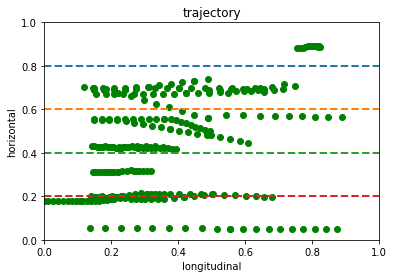

In [38]:
for i in range(500):
    aIntest = EnIntrain[i].swapaxes(0, 1)
    aOuttest = EnOuttrain[i].swapaxes(0, 1)

    if EnOutLtest[i][2]==1:
#         continue
        plt.scatter(aOuttest[1], aOuttest[0], c='g')
        plt.scatter(aIntest[1], aIntest[0], c='g')
    elif EnOutLtest[i][1]==1:
        continue
        plt.scatter(aOuttest[1], aOuttest[0], c='r')
        plt.scatter(aIntest[1], aIntest[0], c='r')
    elif EnOutLtest[i][0]==1:
        continue
        plt.scatter(aOuttest[1], aOuttest[0], c='b')
        plt.scatter(aIntest[1], aIntest[0], c='b')

plt.plot(np.linspace(0, 1, 2), [0.8, 0.8], lw=2, linestyle='--')
plt.plot(np.linspace(0, 1, 2), [0.6, 0.6], lw=2, linestyle='--')
plt.plot(np.linspace(0, 1, 2), [0.4, 0.4], lw=2, linestyle='--')
plt.plot(np.linspace(0, 1, 2), [0.2, 0.2], lw=2, linestyle='--')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('trajectory')
plt.ylabel('horizontal')
plt.xlabel('longitudinal')
# plt.legend()
plt.show()

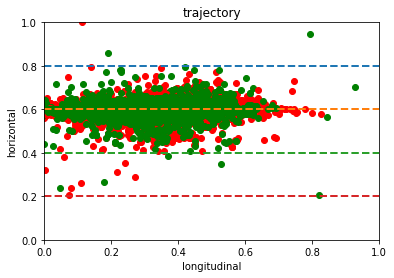

In [36]:
for i in range(1000):
    aIntest = IncIntrain11[i].swapaxes(0, 1)
    aOuttest = IncOuttrain11[i].swapaxes(0, 1)
    if EnOutLtest[i][2]==1:
#         continue
        plt.scatter(aOuttest[1], aOuttest[0], c='g')
        plt.scatter(aIntest[1], aIntest[0], c='g')
    elif EnOutLtest[i][1]==1:
#         continue
        plt.scatter(aOuttest[1], aOuttest[0], c='r')
        plt.scatter(aIntest[1], aIntest[0], c='r')
    elif EnOutLtest[i][0]==1:
        continue
        plt.scatter(aOuttest[1], aOuttest[0], c='b')
        plt.scatter(aIntest[1], aIntest[0], c='b')

plt.plot(np.linspace(0, 1, 2), [0.8, 0.8], lw=2, linestyle='--')
plt.plot(np.linspace(0, 1, 2), [0.6, 0.6], lw=2, linestyle='--')
plt.plot(np.linspace(0, 1, 2), [0.4, 0.4], lw=2, linestyle='--')
plt.plot(np.linspace(0, 1, 2), [0.2, 0.2], lw=2, linestyle='--')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('trajectory')
plt.ylabel('horizontal')
plt.xlabel('longitudinal')
# plt.legend()
plt.show()